# 비계층적 군집분석

## k-means clustering

군집의 수 K를 결정

임의의 K개의 점을 군집의 중심으로 이용

군집의 중심으로부터 거리를 구하여 군집에 소속시킴

새로운 군집의 중심을 계산

위 과정을 반복

보통 와드의 방법으로 계층적 군집분석을 수행 후 그 중심점을 k-means의 초기값으로 사용함

In [2]:
beer.data <- read.csv("mvadata/beerbrand.csv")

In [3]:
library(pls)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [4]:
zbeer.data <- stdize(as.matrix(beer.data))

In [5]:
kmc <- kmeans(zbeer.data, 2)

In [6]:
kmc

K-means clustering with 2 clusters of sizes 16, 4

Cluster means:
    calories     sodium    alcohol       cost
1 -0.1887962  0.1595436 -0.1760382 -0.4625864
2  0.7551849 -0.6381744  0.7041527  1.8503457

Clustering vector:
            BUDWEISER               SCHLITZ             LOWENBRAU 
                    1                     1                     1 
          KRONENBOURG              HEINEKEN         OLD MILWAUKEE 
                    2                     2                     1 
           AUGSBERGER STROHS BOHEMIAN STYLE           MILLER LITE 
                    1                     1                     1 
      BUDWEISER LIGHT                 COORS           COORS LIGHT 
                    1                     1                     1 
       MICHELOB LIGHT                 BECKS                 KIRIN 
                    1                     2                     2 
    PABST EXTRA LIGHT                 HAMMS   HEILEMANS OLD STYLE 
                    1                  

kmc 메소드로 k-means 군집분석함 <br>
군집의 수를 패러미터로 조정할 수 있음 <br>
군집의 평균으로 군집의 특성을 알 수 있음 <br>
어떤 관측치가 어느 군집에 속하는지 알 수 있음 <br>

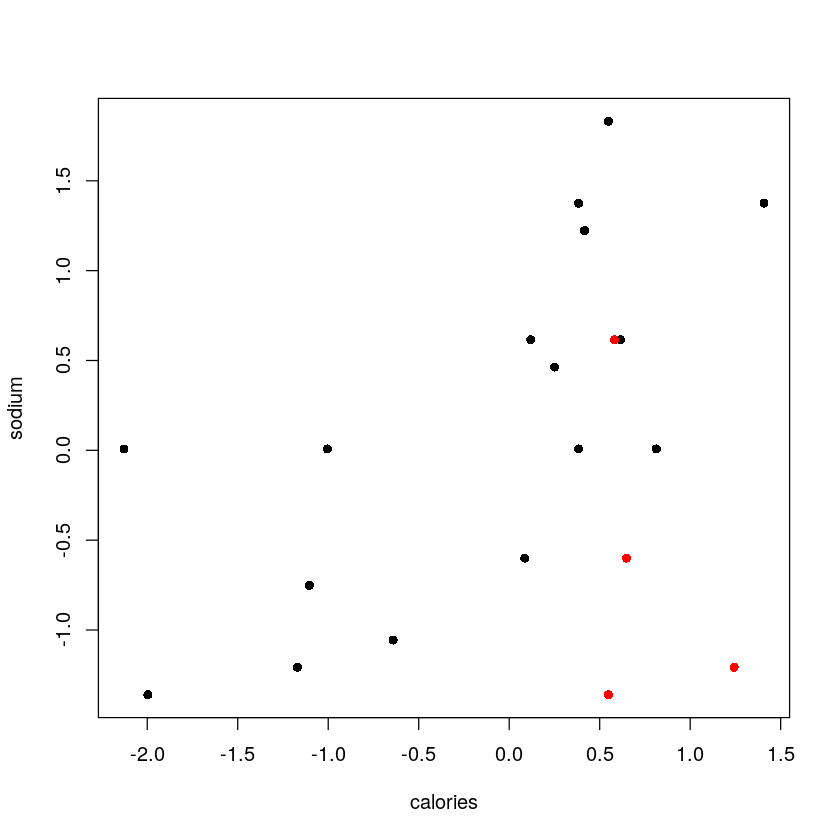

In [7]:
plot(zbeer.data, col = kmc$cluster, pch = 16)

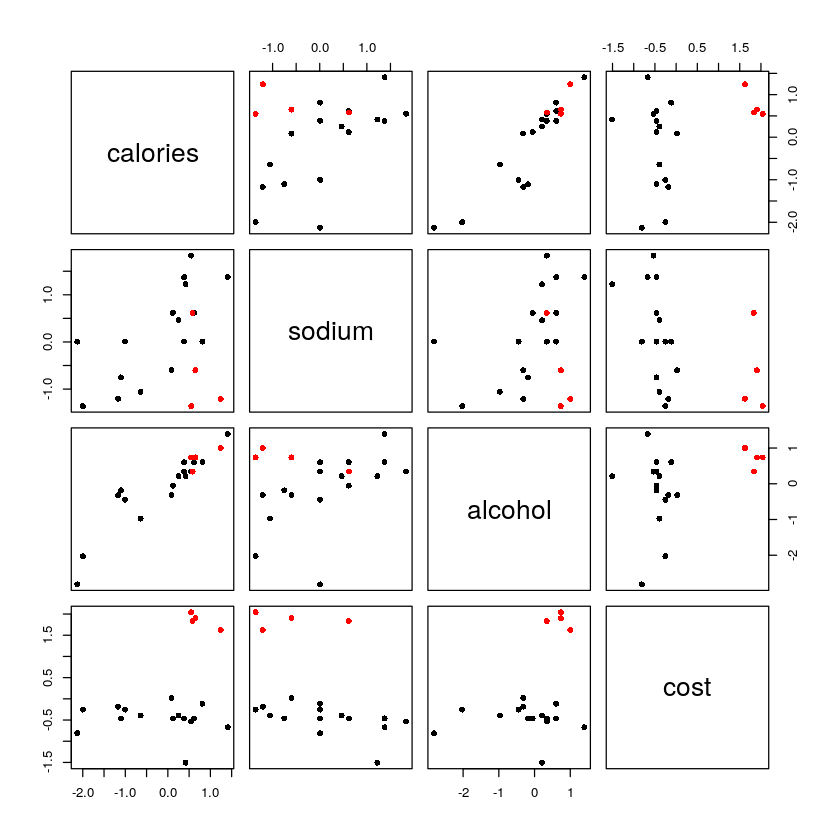

In [8]:
pairs(zbeer.data, col = kmc$cluster, pch = 16)

계층과 비계층은 다른 값을 도출한다.

# USArrest

In [9]:
hcl <- hclust(dist(USArrests), method = "average")

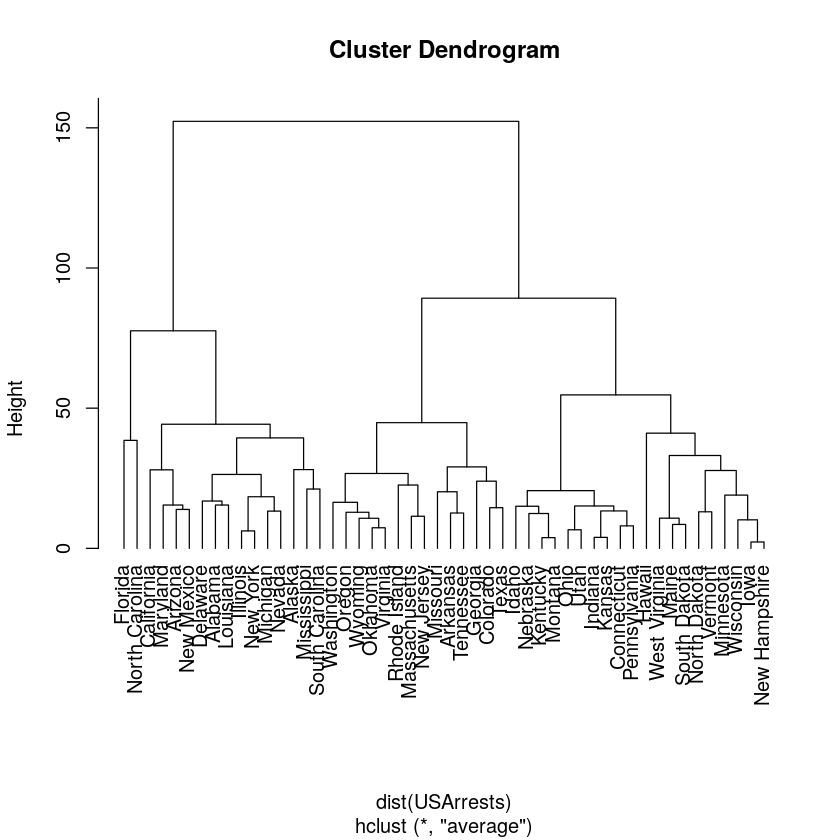

In [13]:
plot(hcl, hang = -1)

In [15]:
hcmember <- cutree(hcl, k = 4)
hcmember

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              4              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              4              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [16]:
cent = NULL
for (k in 1:4) {
    cent = rbind(cent, colMeans(USArrests[hcmember == k, , drop = F]))
}
cent

Murder,Assault,UrbanPop,Rape
11.471429,263.5000,69.14286,29.00000
8.214286,173.2857,70.64286,22.84286
4.270000,87.5500,59.75000,14.39000
14.200000,336.0000,62.50000,24.00000


In [17]:
zUSArrests <- stdize(as.matrix(USArrests))

In [18]:
km1 <- kmeans(zUSArrests, 4)

In [19]:
km1

K-means clustering with 4 clusters of sizes 8, 13, 13, 16

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.9615407 -1.1066010 -0.9301069 -0.96676331
4 -0.4894375 -0.3826001  0.5758298 -0.26165379

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              4              4              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             4              3              2              4              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             4              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

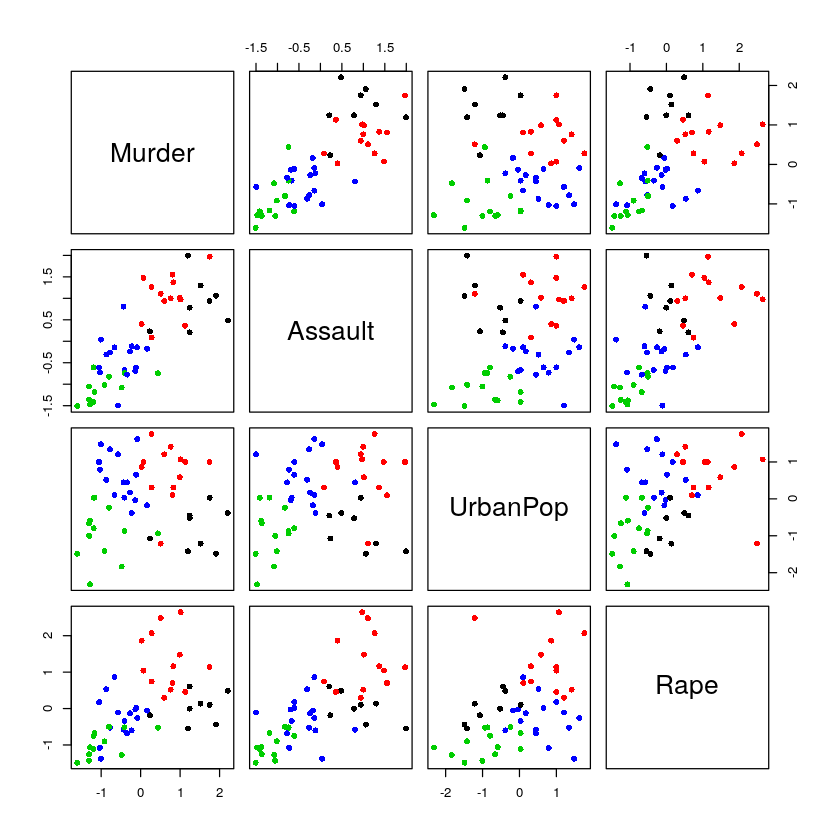

In [20]:
pairs(zUSArrests, col = km1$cluster, pch = 16)